In [50]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [51]:
data = pd.DataFrame(pd.read_csv("/home/kalema/Downloads/heart.csv", header=0))

In [52]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [53]:
selected_features = ["exang", "chol", "cp", "thalach", "trestbps"]
X = data[selected_features]  
y = data["target"] 

Default Logistic Regression Model Metrics:
Accuracy: 0.7365853658536585


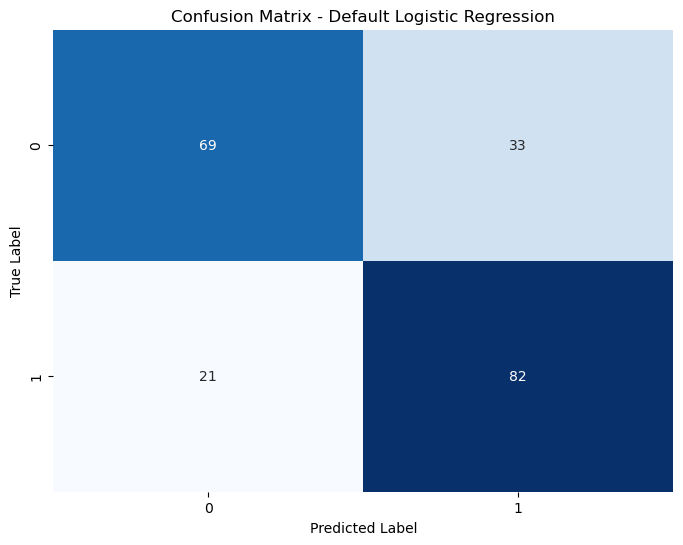

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

default_lr_model = LogisticRegression()
default_lr_model.fit(X_train, y_train)

y_pred_default = default_lr_model.predict(X_test)

# Evaluation metrics
accuracy_default = accuracy_score(y_test, y_pred_default)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)

print("Default Logistic Regression Model Metrics:")
print("Accuracy:", accuracy_default)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_default, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix - Default Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [56]:
import warnings
warnings.filterwarnings('ignore')
param_grid = param_grid = [{'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'class_weight': [None, 'balanced']
   }, {
    'solver': ['saga'],
    'penalty': ['elasticnet'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'class_weight': [None, 'balanced']
}]

grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring='recall_macro', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best hyperparameters:", best_params)


Best hyperparameters: {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


Tuned Logistic Regression Model Metrics:
Accuracy: 0.7902439024390244


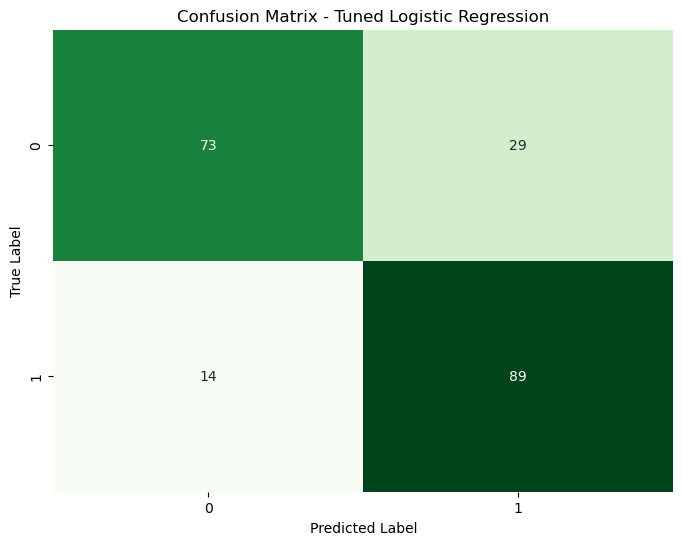

In [58]:
best_lr_model = grid_search.best_estimator_
y_pred_tuned = best_lr_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

print("Tuned Logistic Regression Model Metrics:")
print("Accuracy:", accuracy_tuned)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, cmap="Greens", fmt="d", cbar=False)
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
